In [1]:
import pandas as pd
import numpy as np
import os
import re
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
import math
from sklearn import metrics
from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
os.chdir('D:/') #set working directory to D:

In [3]:
os.getcwd()  #check for wd

'D:\\'

In [4]:
student = pd.read_csv("student-por.csv", delimiter = ";")

Attributes for student-por.csv (Portuguese language course) datasets:
1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)

These grades are related with the course subject Portuguese:
31. G1 - first period grade (numeric: from 0 to 20)
31. G2 - second period grade (numeric: from 0 to 20)
32. G3 - final grade (numeric: from 0 to 20, output target)

In [5]:
pd.set_option("display.max_columns", student.shape[0])

In [6]:
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [7]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [8]:
student.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [9]:
stu_copy = student.copy()

In [10]:
stu_copy.drop("G1", axis=1, inplace=True)

In [11]:
stu_copy.drop("G2", axis=1, inplace=True)

In [12]:
stu_copy.drop("G3", axis=1, inplace=True)

In [13]:
stu_copy

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6


In [14]:
def train_cats(df):
    for col_names, col in df.items():
        if is_string_dtype(col):
            df[col_names] = col.astype("category").cat.as_ordered()

In [15]:
train_cats(stu_copy)

In [16]:
def apply_cats(df, train):
    for col_names, col in df.items():
        if train[col_names].dtytpe == "category":
            df[col_names] = pd.Categorical(c, categories = train[col_names].cat.categories, ordered = True)

In [17]:
stu_copy["sex"].cat.categories

Index(['F', 'M'], dtype='object')

In [18]:
stu_copy["famsize"].cat.set_categories(["LE3","GT3"], ordered = True, inplace =True)

In [19]:
stu_copy["famsize"].cat.codes

0      1
1      1
2      0
3      1
4      1
      ..
644    1
645    0
646    1
647    0
648    0
Length: 649, dtype: int8

In [20]:
stu_copy["famsize"].cat.categories

Index(['LE3', 'GT3'], dtype='object')

In [21]:
#Calling 0 for no and 1 for yes
stu_copy["schoolsup"].cat.set_categories(["no","yes"], ordered = True, inplace =True)
stu_copy["famsup"].cat.set_categories(["no","yes"], ordered = True, inplace =True)
stu_copy["paid"].cat.set_categories(["no","yes"], ordered = True, inplace =True)
stu_copy["activities"].cat.set_categories(["no","yes"], ordered = True, inplace =True)
stu_copy["nursery"].cat.set_categories(["no","yes"], ordered = True, inplace =True)
stu_copy["higher"].cat.set_categories(["no","yes"], ordered = True, inplace =True)
stu_copy["internet"].cat.set_categories(["no","yes"], ordered = True, inplace =True)
stu_copy["romantic"].cat.set_categories(["no","yes"], ordered = True, inplace =True)

In [22]:
stu_copy["romantic"].cat.codes

0      0
1      0
2      0
3      1
4      0
      ..
644    0
645    0
646    0
647    0
648    0
Length: 649, dtype: int8

In [23]:
stu_copy["romantic"].cat.categories

Index(['no', 'yes'], dtype='object')

In [24]:
#save it as a feather format file
stu_copy.to_feather("D:/stu_copy")

In [25]:
def numericalize(df, col, name):
    if not is_numeric_dtype(col):
        df[name] = col.cat.codes

In [26]:
for n, c in stu_copy.items():
        numericalize(stu_copy, c, n)

In [27]:
stu_copy

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,0,0,18,1,1,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4
1,0,0,17,1,1,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2
2,0,0,15,1,0,1,1,1,0,2,2,1,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6
3,0,0,15,1,1,1,4,2,1,3,1,1,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0
4,0,0,16,1,1,1,3,3,2,2,1,0,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,0,1,1,2,3,3,2,0,1,1,3,1,0,0,0,1,0,1,1,0,5,4,2,1,2,5,4
645,1,0,18,1,0,1,3,1,4,3,0,1,1,2,0,0,1,0,0,1,1,1,0,4,3,4,1,1,1,4
646,1,0,18,1,1,1,1,1,2,2,0,1,2,2,0,0,0,0,1,1,1,0,0,1,1,1,1,1,5,6
647,1,1,17,1,0,1,3,1,3,3,0,1,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,6


In [28]:
def split_train_val(df,n): 
    
    return df[:n].copy(), df[n:].copy()

In [29]:
n_train = 500
n_valid = 100
n_test = 49
train_student, valid_student = split_train_val(stu_copy, n_train)

In [30]:
train_student.shape

(500, 30)

In [31]:
y_compare = student["G3"]
stu_train = stu_copy[0:500]
stu_train_y = student["G3"][0:500]
stu_valid = stu_copy[500:600]
stu_valid_y = student["G3"][500:600]
stu_test = stu_copy[600:650]
stu_test_y = student["G3"][600:650]

In [32]:
stu_valid_y.shape

(100,)

In [33]:
y = student["G3"].values

In [34]:
y

array([11, 11, 12, 14, 13, 13, 13, 13, 17, 13, 14, 13, 12, 13, 15, 17, 14,
       14,  7, 12, 14, 12, 14, 10, 10, 12, 12, 11, 13, 12, 11, 15, 15, 12,
       12, 11, 14, 13, 12, 12, 10, 11, 15, 10, 11, 11, 13, 17, 13, 12, 13,
       16,  9, 12, 13, 12, 15, 16, 14, 16, 16, 16, 10, 13, 12, 16, 12, 10,
       11, 15, 11, 10, 11, 14, 11, 11, 11, 13, 10, 11, 12,  9, 11, 13, 12,
       12, 11, 15, 11, 10, 11, 13, 12, 14, 12, 13, 11, 12, 13, 13,  8, 16,
       12, 10, 16, 10, 10, 14, 11, 14, 14, 11, 10, 18, 10, 14, 16, 15, 11,
       14, 14, 13, 13, 13, 11,  9, 11, 11, 15, 13, 12,  8, 11, 13, 12, 14,
       11, 11, 11, 15, 10, 13, 12, 11, 11, 10, 10, 14,  9, 11,  9, 13, 11,
       13, 11,  6, 12, 10, 11, 13, 11,  8, 11,  0, 10, 13, 11, 13,  8, 10,
       11, 11,  1, 10,  9,  8, 10,  8,  8,  8, 11, 18, 13, 17, 10, 18, 10,
       13, 15, 11, 14, 10, 11, 13, 11, 13, 17, 14, 16, 14, 11, 16, 14, 10,
       13, 12, 12, 10, 12, 16, 14, 12, 16, 11, 15, 12, 15, 13, 13,  8, 12,
       15, 13, 12, 12, 12

In [35]:
def rmse(x,y): 
    return math.sqrt(((x-y)**2).mean())

In [36]:
def split_train_val(df,n): 
    
    return df[:n].copy(), df[n:].copy()

In [37]:
X_train, X_valid = split_train_val(stu_copy, n_train)
y_train, y_valid = split_train_val(y_compare, n_train)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((500, 30), (500,), (149, 30), (149,))

In [38]:
def print_score(m):
    
    print(f"RMSE of train set {rmse(m.predict(X_train), y_train)}")
    print(f"RMSE of validation set {rmse(m.predict(X_valid), y_valid)}")
    print(f"R^2 of train set {m.score(X_train, y_train)}")
    print(f"R^2 of validation set {m.score(X_valid, y_valid)}")

In [39]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 205 ms
RMSE of train set 0.8434718726786328
RMSE of validation set 4.017311448614332
R^2 of train set 0.901092556745163
R^2 of validation set 0.12644929296229301


In [40]:
def get_sample(df,n):

    idxs = np.random.permutation(len(df))[:n]
    return idxs, df.iloc[idxs].copy()

In [41]:
# Creating subset
idxs, X_train = get_sample(X_train, 300)
y_train = y_train[idxs]

In [42]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 176 ms
RMSE of train set 0.7927309337557944
RMSE of validation set 4.252226657132021
R^2 of train set 0.8952272440979889
R^2 of validation set 0.021299238593531444


In [43]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
t = m.fit(X_train, y_train)
print_score(m)

RMSE of train set 2.004893674328473
RMSE of validation set 4.261453518933787
R^2 of train set 0.3298385411277013
R^2 of validation set 0.017047285527109324


In [44]:
estimator = m.estimators_[0]

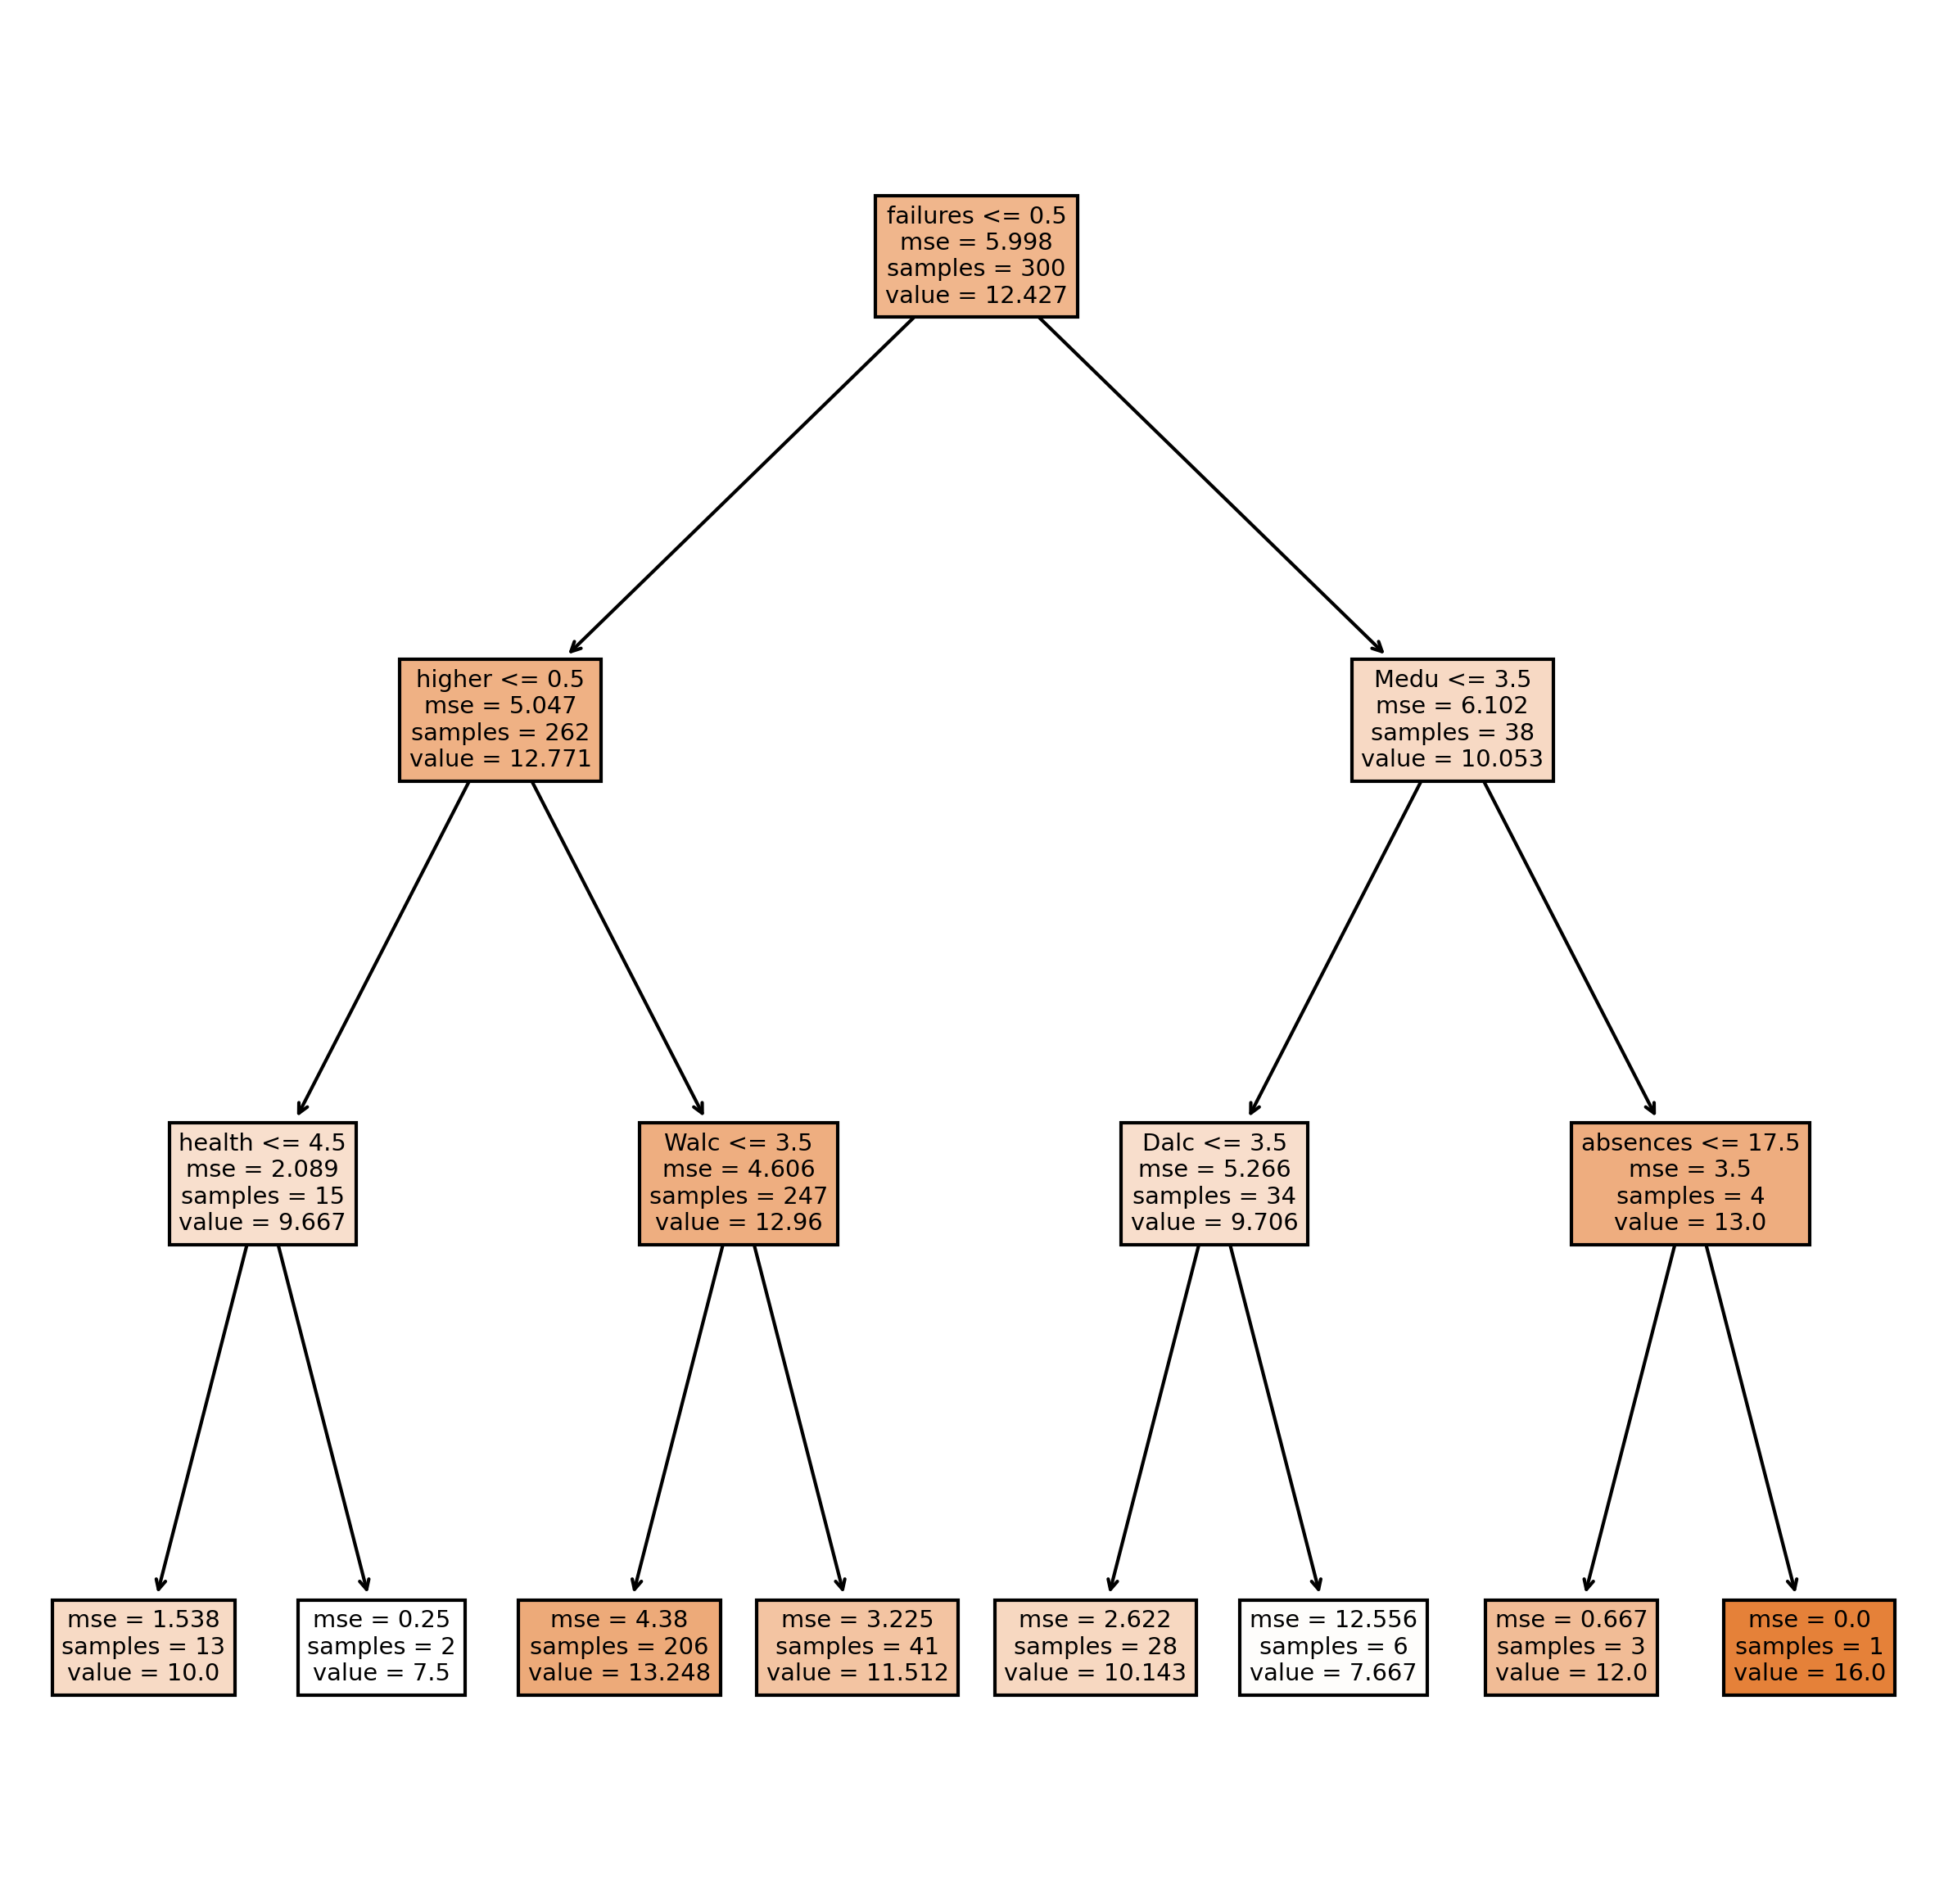

In [45]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(estimator, feature_names=student.columns,filled=True);

In [46]:
#Max depth tree
m = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

RMSE of train set 0.0
RMSE of validation set 4.800027964124359
R^2 of train set 1.0
R^2 of validation set -0.24710967861479105
